In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import matplotlib
#matplotlib.use('GTKAgg')
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

pip install xlrd==1.2.0.  (latest version of xlrd only imports .xls 

In [64]:
df = pd.read_excel ('Data4.xlsx')
                  

<ipython-input-64-f502af631d9a>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df = pd.read_excel ('Data4.xlsx')


In [65]:
df

,Unnamed: 0,Unnamed: 0.1,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt,assigned_class
0,0,0.0,2,Trig,0.831777,0.010254,TPE,0
1,1,1.0,2,Trig,0.811150,0.012185,TPE,0
2,2,2.0,2,Trig,0.821488,0.012809,TPE,0
3,3,3.0,2,Trig,0.834182,0.013310,TPE,0
4,4,4.0,2,Trig,0.861318,0.012172,TPE,0
...,...,...,...,...,...,...,...,...
115,15,NaN,2,power,0.661894,0.010345,TPE,0
116,16,NaN,2,power,0.598379,0.009944,TPE,0
117,17,NaN,2,power,0.575772,0.010296,TPE,0
118,18,NaN,2,power,0.651042,0.010637,TPE,0


In [68]:
print(len(df))
print(df.head())

120
   Unnamed: 0  Unnamed: 0.1  number of parameters type of function  \
0           0           0.0                     2             Trig   
1           1           1.0                     2             Trig   
2           2           2.0                     2             Trig   
3           3           3.0                     2             Trig   
4           4           4.0                     2             Trig   

   accuracy [calc. max/ actual max]  time per trial [s] type_of_opt  \
0                          0.831777            0.010254         TPE   
1                          0.811150            0.012185         TPE   
2                          0.821488            0.012809         TPE   
3                          0.834182            0.013310         TPE   
4                          0.861318            0.012172         TPE   

   assigned_class  
0               0  
1               0  
2               0  
3               0  
4               0  


In [69]:
# replace zeroes
zero_not_accepted = ['number of parameters', 'type of function', 'accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    

In [31]:
# split dataset
# X = df.iloc[:,0:6]
# y = df.iloc[:,5:6]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [70]:
X = df[['accuracy [calc. max/ actual max]','time per trial [s]']]
y = df['assigned_class']

print(len(y))

120


In [71]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14) #14 is seed

print(len(y_train), len(y_test))

96 24


In [72]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [73]:
K_neighbors = 1

In [74]:
#Define the model: Init K-NN
# We create an instance of Neighbours Classifier and fit it to the training data.
# if you set weights = 'distance' here you will have a weighted KNN classifier
clf = neighbors.KNeighborsClassifier(K_neighbors, weights='distance')

# Here we fit it to the data - it figures out the classes and 
# which training X points belong to each class in Y 
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [75]:
print(clf.classes_, clf.effective_metric_, clf.n_samples_fit_)

[0 1 2] euclidean 120


In [76]:
# Predict the test set results
y_test_predicted = clf.predict(X_test)
y_test_probabilities = clf.predict_proba(X_test)
mean_accuracy = clf.score(X_test, y_test)

print("predicted classes", y_test_predicted)
print("KNN probability of belonging to class",y_test_probabilities)
print("Mean accuracy of prediction", mean_accuracy)


predicted classes [1 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 1 0 2 1 2 1 2]
KNN probability of belonging to class [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
Mean accuracy of prediction 0.4166666666666667


In [77]:
X_train[:,0]

array([ 1.11955334,  0.08322242, -1.9900051 , -0.45740226,  0.19698561,
       -0.27178397,  1.32712344, -0.3200028 , -0.07144161, -1.92650388,
        0.29982269, -0.20384565, -0.03975201,  1.21241297, -1.64544462,
        0.05992275, -1.32321848,  0.39337798,  0.79642641,  0.35762558,
        1.1788524 , -1.53834788,  0.10728845,  0.18037587, -1.8602023 ,
       -0.27284566, -0.33740942,  1.21955151,  1.18928432, -0.20141747,
        0.98640443,  0.93575864,  0.24780493, -0.17876572, -0.31016243,
        1.10739711, -0.15526108, -0.27266252,  1.17378013, -0.23165109,
       -1.77668512, -1.55803971,  0.2444258 , -0.40088968, -1.60645113,
        1.27040387, -0.18206076,  0.59745554,  1.33209533,  0.09023171,
       -1.90394855,  1.01757225,  0.71344096, -0.46208041, -0.40871108,
       -1.97198197,  0.17140156,  1.05320826,  0.19660978,  1.28744562,
       -0.29557716,  1.298197  ,  0.96424961, -0.15237628,  0.75129208,
       -0.40669708,  0.76339682, -1.57504931, -1.90094008, -1.68

In [91]:
# Evaluate Model
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[0 5 3]
 [1 3 5]
 [0 0 7]]


In [ ]:
# classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='euclidean')

In [61]:
# Create color maps


In [82]:
def kneighbors_graph(self):
    self.X_train = self.X_train.values
    A = neighbors.kneighbors_graph(self.X_train, 9, 'distance')
    plt.spy(A)
    plt.show

<ipython-input-90-93f798e42662>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


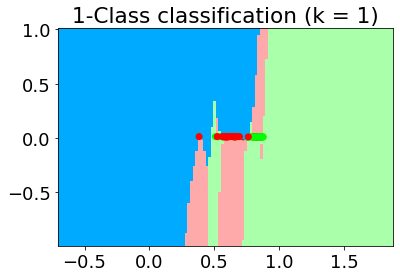

In [90]:
X = X
y = y
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

clf = neighbors.KNeighborsClassifier(K_neighbors, weights='distance')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("1-Class classification (k = %i)" % (K_neighbors))
plt.show()